# Linear Regression

We will use a real-life dataset containing information about size and weight for several fish species.

1. species name of fish (Bream, Roach, Whitefish, Parkki, Perch, Pike, Smelt)
2. weight of fish in grams
3. vertical length in cm (`Length1`)
4. diagonal length in cm (`Length2`)
5. cross length in cm (`Length3`)
6. height in cm
7. diagonal width in cm

We would like to see if we can develop a way to predict the weight of a fish given its dimensions.


The relationship between total length (L, in inches) and total weight (W, in pounds) for nearly all species of fish can be expressed by an equation of the form

\begin{align}
W = cL^b
\end{align}

`W` is weight in pounds and `L` is length in inches. `b` is a constant that is close to 3.0 for all species and `c` is a constance that varies among species (For [northern pike](https://en.wikipedia.org/wiki/Northern_pike#Length_and_weight), for example, `b = 3.096` and `c = 0.000180`).

## Task

**Can we predict the weight of a fish given its dimensions and species?**

## Acquiring the data
First let's load the data into a [Pandas](https://mazelife.github.io/cmsc-291/lecture_10.html#pandas) dataframe:

In [1]:
import pandas

fish_dataframe = pandas.read_csv("Fish.csv", dtype={"Species": "category"})
fish_dataframe

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [2]:
import seaborn
# Seaborn has various themes/styles. We'll pick a good default:
seaborn.set_theme(style="darkgrid")
seaborn.set_context("talk")

seaborn.relplot(x="Length1", y="Weight", hue="Species", data=fish_dataframe, height=8, aspect=1.5)

## Simplifying the problem

For the moment, let's attempt to do univariate linear regression. Let's take *one* measure of dimension (length) and attempt to predict weight for just one species: Pike. We'll start with a scatter plot with just the Pike data:

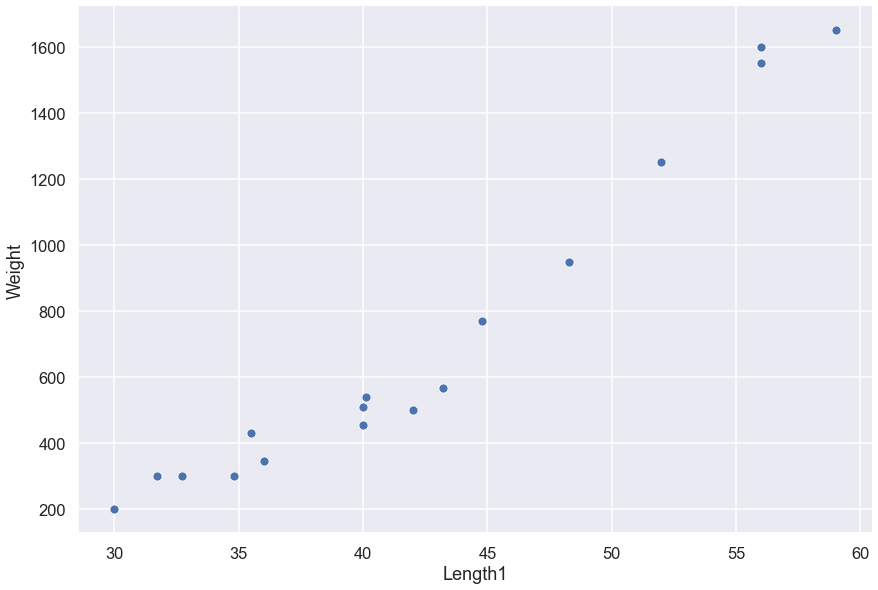

In [3]:
pike_dataframe = fish_dataframe[fish_dataframe.Species == "Pike"]
seaborn.relplot(x="Length1", y="Weight", data=pike_dataframe, height=8, aspect=1.5)

Now we will train a linear regression model using the [scikit-Learn](https://scikit-learn.org/) Python library. One of the first things we will need to do is extract our `X` and `Y` values as individual arrays from the source dataframe, as scikit-learn does not work directly with Pandas. For our case, we want to extract a single DataFrame column for our X values and a single column for our Y values as a pair of arrays. The way to do this is as follows:

```
data_array = dataframe["column name"].values.reshape(-1, 1)
```

From there we will create an instance of the `LinearRegression` and then call `fit()` on it, which will train the model.

In [4]:
from sklearn.linear_model import LinearRegression

x_values = pike_dataframe.Length1.values.reshape(-1, 1)
y_values = pike_dataframe.Weight.values.reshape(-1, 1)
pike_model = LinearRegression()
pike_model.fit(x_values, y_values)

x_values

array([[30. ],
       [31.7],
       [32.7],
       [34.8],
       [35.5],
       [36. ],
       [40. ],
       [40. ],
       [40.1],
       [42. ],
       [43.2],
       [44.8],
       [48.3],
       [52. ],
       [56. ],
       [56. ],
       [59. ]])

Once we have fit the model, we can ask it to do predictions. As we talked about last week, a linear regression model gives us an equation that describes a line:

\begin{align}
y = mx + b \\
m = slope \\
b = intercept
\end{align}

The model tells us what `m` and `b` are (these are called the *coefficients*), so that when we plug in a value for `x`, we will have our prediction for `y`. We can extract those coefficients from the scikit-learn model we just trained.

In [5]:
intercept = pike_model.intercept_[0]
slope = pike_model.coef_[0][0]
print(f"Intercept is: {intercept}")
print(f"Slope is: {slope}")

Intercept is: -1540.824272231702
Slope is: 53.19486584675106


We can also draw the line that our model has produced on top of the scatterplot to see how well it seems to fit:

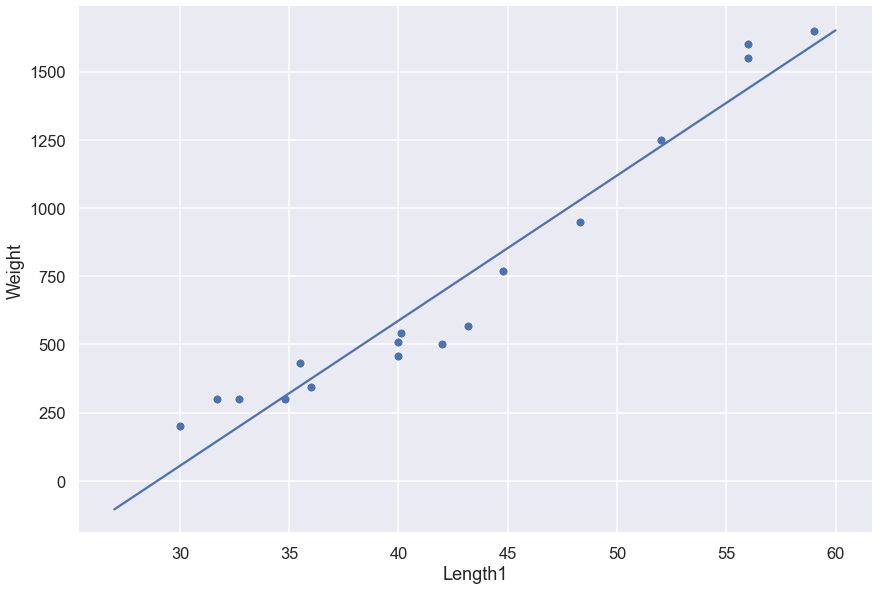

In [6]:
import matplotlib.pyplot as plt
import numpy

# Generate an array of 2 points at 27 and 60 on the x-axis:
x_pred = numpy.array([27, 60])
# Create the corresponding y values for the two X points:
y_pred = slope * x_pred + intercept

seaborn.relplot(x="Length1", y="Weight", data=pike_dataframe, height=8, aspect=1.5)
plt.plot(x_pred, y_pred)

## Evaluating the model

Remember **mean-squared error**?

<img src="https://mazelife.github.io/cmsc-291/images/lin-reg-residuals.png" alt="Residuals" style="width: 400px;"/>    

Let's calculate it! Scikit-learn will help us here, we just need to give it two arrays: one of predicted y values and one of actual y values.

In [7]:
from sklearn.metrics import mean_squared_error

predicted_y = pike_model.predict(x_values)
pike_mse = mean_squared_error(y_values, predicted_y)

print(f"MSE is {pike_mse:,.2f}")
pandas.DataFrame({'Actual': y_values.flatten(), 'Predicted': predicted_y.flatten()})


MSE is 12,692.68


,Actual,Predicted
0,200.0,55.021703
1,300.0,145.452975
2,300.0,198.647841
3,300.0,310.357059
4,430.0,347.593465
5,345.0,374.190898
6,456.0,586.970362
7,510.0,586.970362
8,540.0,592.289848
9,500.0,693.360093


## Overfitting

The only problem here is we don't know if we've overfit. 

<img src="https://i.stack.imgur.com/wwhLV.png"  alt="Overfitting" style="width: 1200px;"/>


A better way to measure how well our model is to split our data into training and test datasets. Scikit-learn will help us with this too:

In [8]:
from sklearn.model_selection import train_test_split


# Split 20% of our data off into testing data:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_values, y_values, test_size=0.2, random_state=0)

# Train our model as usual with the 80% of the data we reserved for training:
pike_model = LinearRegression()
pike_model.fit(x_training_data, y_training_data)

# Then have it predict X values
predicted_y = pike_model.predict(x_test_data)
print("Mean-squared error: {:,.2f}".format(mean_squared_error(y_test_data, predicted_y)))
pandas.DataFrame({'Actual': y_test_data.flatten(), 'Predicted': predicted_y.flatten()})

Mean-squared error: 22,682.16


,Actual,Predicted
0,300.0,153.707099
1,456.0,601.323002
2,540.0,606.715965
3,500.0,709.182256


## Polynomial Regression

Our model works...OK. But the MSE on "real-world" data is somewhat high. You could say that out model under-fits the data. To overcome under-fitting, we need to increase the complexity of the model. What if we try to fit this line with a curve?


In [9]:
from sklearn.preprocessing import PolynomialFeatures 

poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_values)
#poly_reg.fit(x_poly,y_values)
poly_pike_model = LinearRegression()
poly_pike_model.fit(x_poly,y_values)


LinearRegression()

Mean-squared error: 22682.15590483156


,Actual,Predicted
0,300.0,153.707099
1,456.0,601.323002
2,540.0,606.715965
3,500.0,709.182256


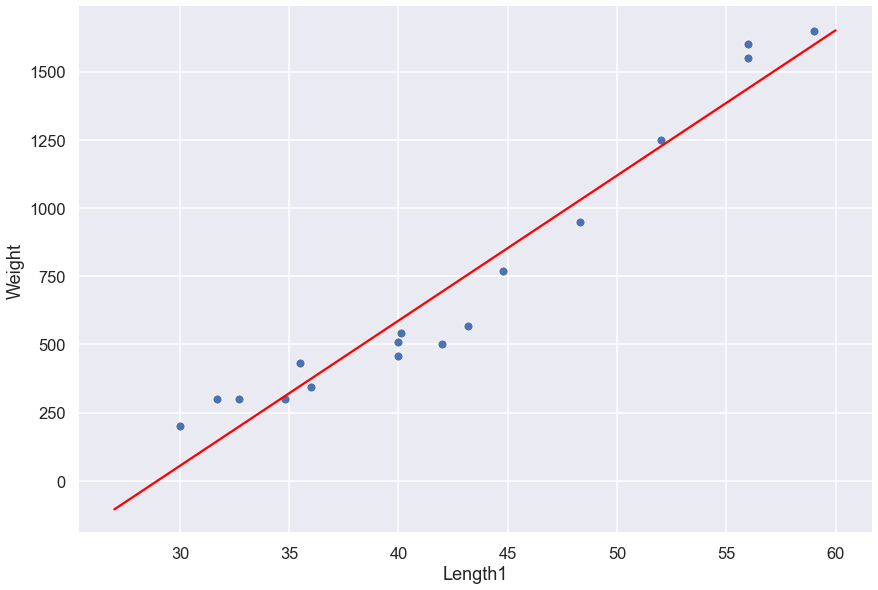

In [10]:
# Generate an array of 2 points at 27 and 60 on the x-axis:
x_pred = numpy.array([27, 60])
# Create the corresponding y values for the two X points:
y_pred = slope * x_pred + intercept

seaborn.relplot(x="Length1", y="Weight", data=pike_dataframe, height=8, aspect=1.5)
plt.plot(x_pred, y_pred, color="red")


print("Mean-squared error: {}".format(mean_squared_error(y_test_data, predicted_y)))
pandas.DataFrame({'Actual': y_test_data.flatten(), 'Predicted': predicted_y.flatten()})

Mean-squared error: 3536.7667906426846


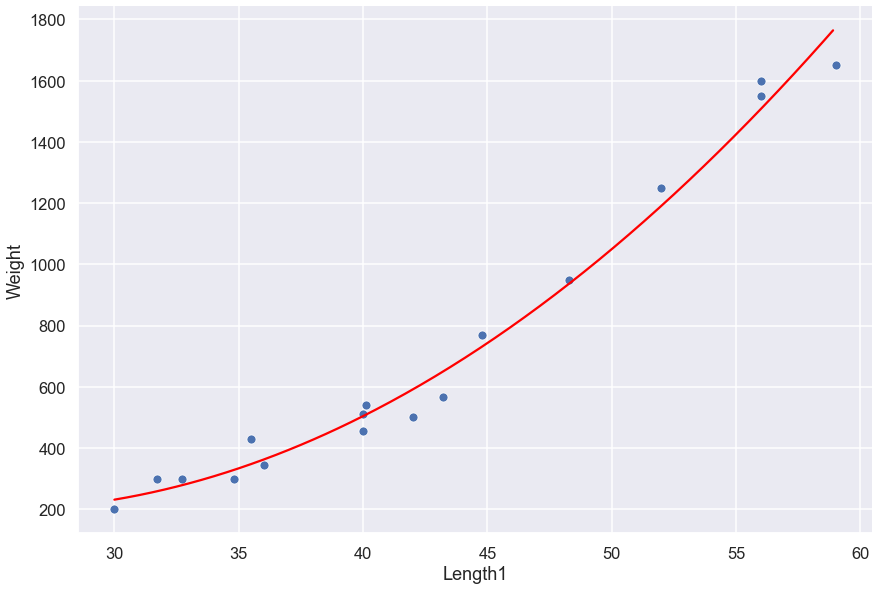

In [11]:
# Generate an array of points:
x_grid = numpy.arange(min(x_values), max(x_values), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

# Create the corresponding y values for the X points using a polynomial model:
y_grid = poly_pike_model.predict(poly_reg.fit_transform(x_grid))

seaborn.relplot(x="Length1", y="Weight", data=pike_dataframe, height=8, aspect=1.5)
plt.plot(x_grid, y_grid, color="red")


predicted_y = poly_pike_model.predict(poly_reg.fit_transform(x_values))
print("Mean-squared error: {}".format(mean_squared_error(y_values, predicted_y)))

In [13]:
x_values

array([[30. ],
       [31.7],
       [32.7],
       [34.8],
       [35.5],
       [36. ],
       [40. ],
       [40. ],
       [40.1],
       [42. ],
       [43.2],
       [44.8],
       [48.3],
       [52. ],
       [56. ],
       [56. ],
       [59. ]])

In [14]:
x_poly

array([[1.00000e+00, 3.00000e+01, 9.00000e+02],
       [1.00000e+00, 3.17000e+01, 1.00489e+03],
       [1.00000e+00, 3.27000e+01, 1.06929e+03],
       [1.00000e+00, 3.48000e+01, 1.21104e+03],
       [1.00000e+00, 3.55000e+01, 1.26025e+03],
       [1.00000e+00, 3.60000e+01, 1.29600e+03],
       [1.00000e+00, 4.00000e+01, 1.60000e+03],
       [1.00000e+00, 4.00000e+01, 1.60000e+03],
       [1.00000e+00, 4.01000e+01, 1.60801e+03],
       [1.00000e+00, 4.20000e+01, 1.76400e+03],
       [1.00000e+00, 4.32000e+01, 1.86624e+03],
       [1.00000e+00, 4.48000e+01, 2.00704e+03],
       [1.00000e+00, 4.83000e+01, 2.33289e+03],
       [1.00000e+00, 5.20000e+01, 2.70400e+03],
       [1.00000e+00, 5.60000e+01, 3.13600e+03],
       [1.00000e+00, 5.60000e+01, 3.13600e+03],
       [1.00000e+00, 5.90000e+01, 3.48100e+03]])

In [18]:
simple_xs = numpy.array([[1], [2], [3]])
simple_xs

array([[1],
       [2],
       [3]])

In [19]:
PolynomialFeatures(degree=2).fit_transform(simple_xs)


array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])